Steps  
- `Step :1` : Import the dataset 
- `Step :2` : Visualize the dataset - Correlation matrix,scatter plots etc
- `Step :3` : Normalize the dataset  - Mean zero centered and feature scaling
- `Step :4` : Implement SVD 
- `Step :5  : Select the principle components ( Means, first, second, n singular vectors in order of their strenghth)
- `Step :6` : Calculate new $Y =X.W$, where $W$ is the matrix having singular loading vectors. 
- `Step :7` : Plot the values 
- `Step :8` : Understand and explain the variance. 


### 1. Importing Dataset -> Visualize the data -> Normalize the Dataset

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
df = pd.DataFrame(data['data'])  #features
y = pd.DataFrame(data['target']) # target
df.columns =data['feature_names'] # assinging column names to features

In [ ]:
print(y.value_counts())  

1    357
0    212
dtype: int64


In [ ]:
print(data['DESCR'])  # Details about the dataset. 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

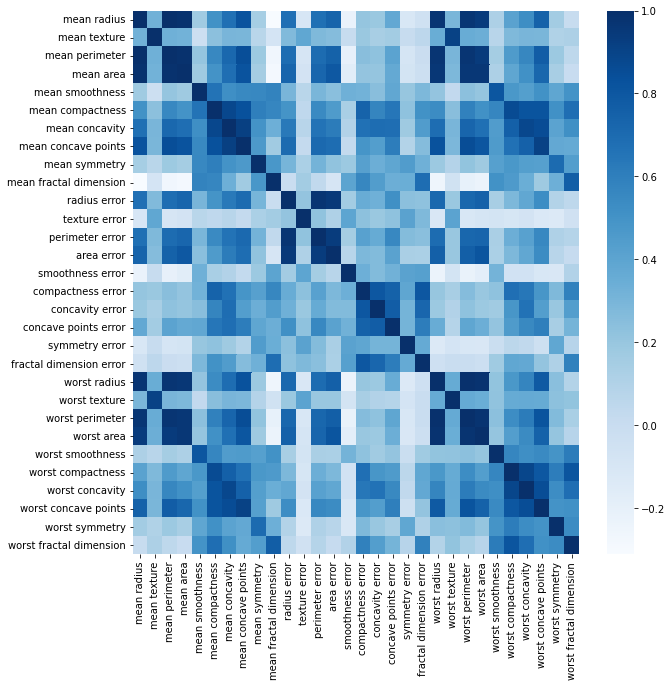

In [ ]:
plt.figure(figsize=(10, 10))
corr = df.corr()
# plot the heatmap
sns.heatmap(corr,cmap="Blues")

In [ ]:
print(df)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [ ]:
# Normalizing & Scaling 
df1 = (df - df.mean(axis=0))/df.std(axis=0)
print(df1)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0       1.096100     -2.071512  ...        2.748204                 1.935312
1       1.828212     -0.353322  ...       -0.243675                 0.280943
2       1.578499      0.455786  ...        1.151242                 0.201214
3      -0.768233      0.253509  ...        6.040726                 4.930672
4       1.748758     -1.150804  ...       -0.867590                -0.396751
..           ...           ...  ...             ...                      ...
564     2.109139      0.720838  ...       -1.358963                -0.708467
565     1.703356      2.083301  ...       -0.531387                -0.973122
566     0.701667      2.043775  ...       -1.103578                -0.318129
567     1.836725      2.334403  ...        1.917396                 2.217684
568    -1.806811      1.220718  ...       -0.048096                -0.750546

[569 rows x 30 columns]


In [ ]:
A = np.array(df1)
print(A.shape)

(569, 30)


# 2. Implementing SVD and PCA 

In [ ]:
def eigen_value(B,b_k):

  # uses property A.v = lamda .v 
  lambda_ = np.linalg.norm(np.dot(B,b_k))
  return lambda_


In [ ]:
def power_iteration(A,eps):

  B = np.dot(A.T, A)
  b_k = np.random.randn(A.shape[1])
  current = b_k

  while True:
    
    b_k1 = np.dot(B,b_k)
    b_k1_norm  = np.linalg.norm(b_k1)
    b_k = np.divide(b_k1,b_k1_norm)
    next = b_k
    
    if abs(np.dot(current, next)) > 1 -  eps:
      S = np.sqrt(eigen_value(B,b_k))
      return S,b_k   
    current  = b_k


In [ ]:
def svd(A,k=None,eps=1e-10):

  n,m = A.shape

  svdsofar = []
  S = []
  u_s = []
  v_s = []
  if k == None:
    k = m
  for i in range(k):

    matrix1D = A.copy()

 
    for singularvalue, u, v in svdsofar[:i]:   
      matrix1D = matrix1D - (singularvalue *  np.outer(u,v))

    singularvalue, v =  power_iteration(matrix1D,eps)
    u  = np.dot(A,v)/np.linalg.norm(np.dot(A,v))
    svdsofar.append((singularvalue,u,v))
    # Maintaining seperate lists for U,sigma,V
    S.append(singularvalue)
    u_s.append(u)
    v_s.append(v)

  v_s = np.array(v_s).reshape(k,A.shape[1])
  u_s = np.array(u_s).reshape(k,A.shape[0])
  S = np.array(S).reshape(1,k)
  #SingularVal, Us, Vs = [np.array(x) for x in zip(*svdsofar)]

  return S, u_s, v_s

In [ ]:
S,U,V = svd(A,eps=1e-10)

In [ ]:
# Checking our SVD output against the linalg library 
lb_U,lb_S,lb_V  = np.linalg.svd(A)

The signs of the singular vectors are opposite, but that doesn't change the overall direction of the vector in the dimensional space. So we are good. We will go ahead and use the ouput of our SVD implementation to create the Z matrix.

In [ ]:
# Plot using my SVD function implementation 
part_V = V[0:2,:]
Z = np.dot(A,part_V.T)

<function matplotlib.pyplot.plot>

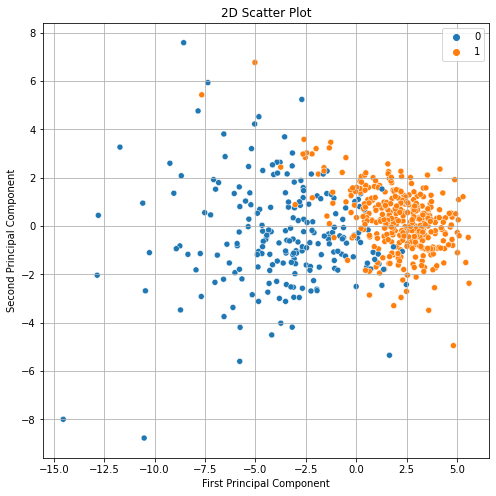

In [ ]:
# Plotting the points in 2D plane, based on the first 2 principal components. 
plt.figure(figsize=(8,8))
plt.grid()
sns.scatterplot(x=Z[:,0],y=Z[:,1],hue=data['target'])
#plt.xlim((-1000,2000))
#plt.ylim((-400,400))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D Scatter Plot")
plt.plot

In [ ]:
part_V = V[0:3,:]
Z = np.dot(A,part_V.T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


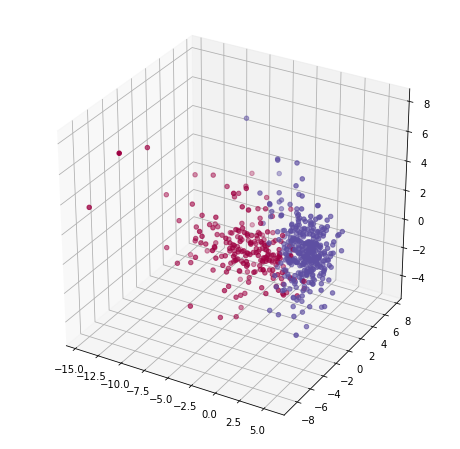

In [ ]:
plt.figure(figsize=(8,8))
plt.grid()
ax = plt.axes(projection='3d')
ax.scatter3D(Z[:,0],Z[:,1],Z[:,2],c=data['target'],cmap='Spectral',marker='o')
plt.show()